https://ds4ps.org/PROG-EVAL-III/DiffInDiff.html

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
# Carregue os dados do arquivo CSV em um DataFrame do Pandas
data = pd.read_csv('/content/meses-cluster - Página1.csv')

In [ ]:
data.head()

,id,SAP ID,X [m]/Long(º),Y [m]/Lat(º),status,controle,casos,mes
0,948054964,ED-1316-RD-IP-019900-TRS0014-APO0022,-8.726065,41.270429,#N/D,1,0,NaN
1,948054932,ED-1316-RD-IP-019900-TRS0014-APO0026,-8.725891,41.270121,#N/D,1,0,NaN
2,948054732,ED-1316-RD-IP-019900-TRS0014-APO0018,-8.725931,41.269791,#N/D,1,0,NaN
3,924690913,ED-1308-RD-IP-061100-TRS0003-APO0003,-8.700994,41.260061,#N/D,1,0,NaN
4,924690953,ED-1308-RD-IP-061100-TRS0003-APO0004,-8.701204,41.259915,#N/D,1,0,NaN


In [ ]:
# Suponha que 'mes' seja o nome da coluna que indica o mês
meses_antes = [7, 8]  # Meses antes
meses_depois = [7, 8, 9]  # Meses depois

In [ ]:
# Filtrando os dados para casos igual a 1 nos meses antes e depois
casos_antes = data[(data['casos'] == 1) & (data['mes'].isin(meses_antes))]
casos_depois = data[(data['casos'] == 1) & (data['mes'].isin(meses_depois))]

In [ ]:
# Calculando a média antes e depois e dividindo pelos respectivos números de meses
media_antes = casos_antes['casos'].sum() / 2  # Dividido por 2 (meses 7 e 8)
media_depois = casos_depois['casos'].sum() / 3  # Dividido por 3 (meses 7, 8 e 9)

In [ ]:
# Calculando a diferença
diff = media_depois - media_antes
diff

11.5

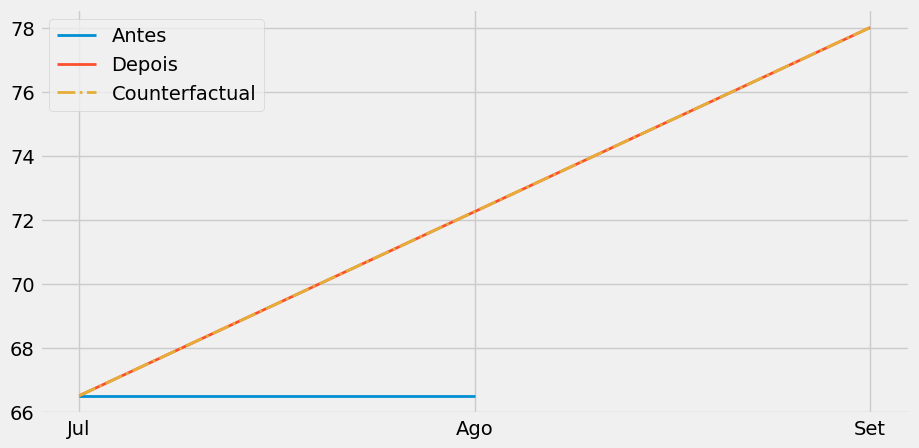

Diferença na Média: 11.5


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(["Jul", "Ago"], [media_antes, media_antes], label="Antes", lw=2)
plt.plot(["Jul", "Set"], [media_antes, media_depois], label="Depois", lw=2)
plt.plot(["Jul", "Set"], [media_antes, media_antes + diff],
         label="Counterfactual", lw=2, color="C2", ls="-.")
plt.legend()

# Você pode personalizar os rótulos e cores conforme necessário
plt.xlabel
plt.ylabel
plt.title
plt.show()

print("Diferença na Média:", diff)


teste

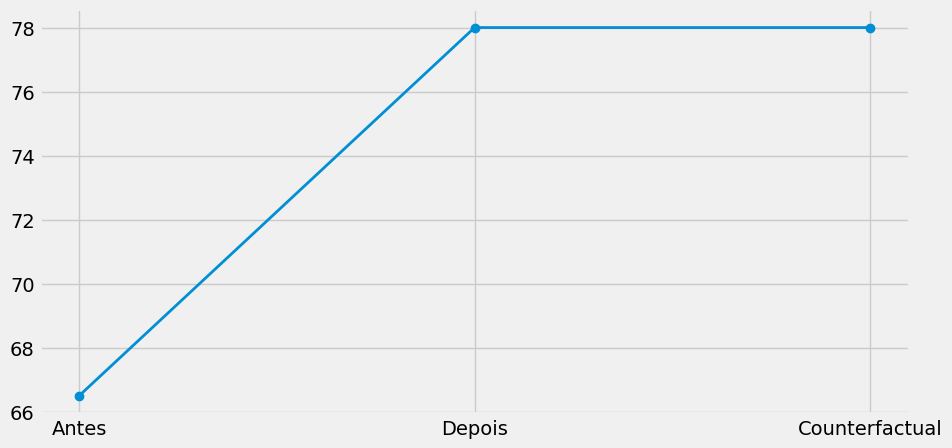

Diferença na Média: 11.5


In [ ]:
etiquetas = ["Antes", "Depois", "Counterfactual"]
valores = [media_antes, media_depois, media_antes + diff]

plt.figure(figsize=(10, 5))
plt.plot(etiquetas, valores, marker='o', lw=2)
plt.grid(True)
plt.xlabel
plt.ylabel
plt.title
plt.show()

print("Diferença na Média:", diff)

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Suponha que 'mes' seja o nome da coluna que indica o mês
meses_antes = [7, 8]  # Meses antes
meses_depois = [7, 8, 9]  # Meses depois

# Filtrando os dados para casos igual a 1 nos meses antes e depois
casos_antes = data[(data['casos'] == 1) & (data['mes'].isin(meses_antes))]
casos_depois = data[(data['casos'] == 1) & (data['mes'].isin(meses_depois))]

# Calculando a média antes e depois e dividindo pelos respectivos números de meses
media_antes = casos_antes['casos'].mean()  # Média dos casos nos meses 7 e 8
media_depois = casos_depois['casos'].mean()  # Média dos casos nos meses 7, 8 e 9

# Criando as colunas 'Pós-Intervencao' e 'Tratamento * Pós-Intervencao'
data['Pós-Intervencao'] = data['mes'].isin(meses_depois).astype(int)
data['Tratamento * Pós-Intervencao'] = data['Tratamento'] * data['Pós-Intervencao']

# Realizando uma análise Diff-in-Diff
X = sm.add_constant(data[['Tratamento', 'Pós-Intervencao', 'Tratamento * Pós-Intervencao']])
y = data['casos']

modelo = sm.OLS(y, X)
resultado = modelo.fit()

# Exibindo os resultados do modelo
print(resultado.summary())




                            OLS Regression Results                            
Dep. Variable:                  casos   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.602e+04
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:27:05   Log-Likelihood:                 19678.
No. Observations:               27601   AIC:                        -3.935e+04
Df Residuals:                   27599   BIC:                        -3.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

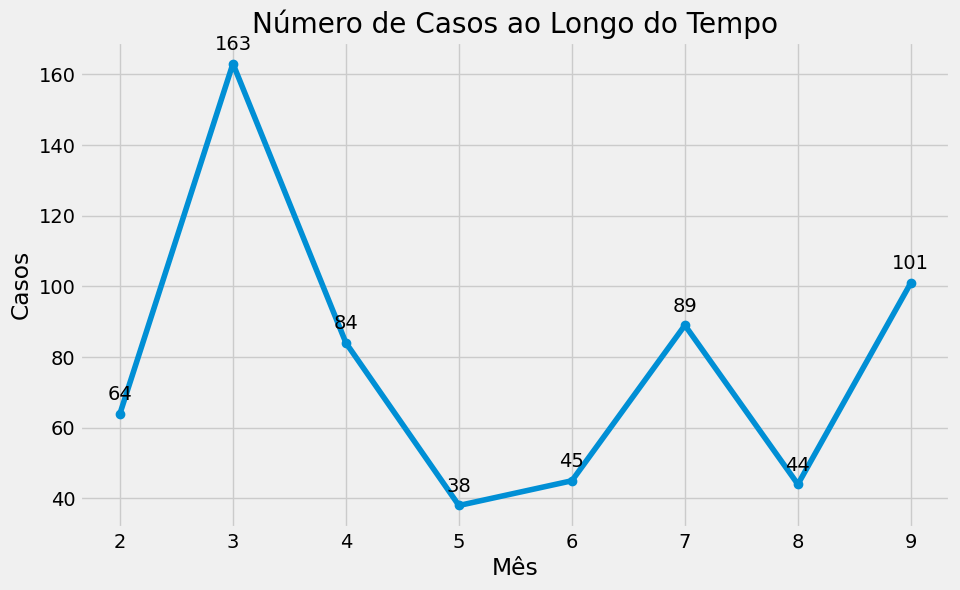

In [ ]:
# Agrupe os dados por mês e calcule o total de casos em cada mês
casos_por_mes = data.groupby("mes")["casos"].sum()

# Obtenha os meses únicos
meses = casos_por_mes.index

# Obtenha o número de casos para cada mês
casos = casos_por_mes.values

# Crie um gráfico de linhas para visualizar a relação entre meses e casos
plt.figure(figsize=(10, 6))
plt.plot(meses, casos, marker='o', linestyle='-')
plt.xlabel("Mês")
plt.ylabel("Casos")
plt.title("Número de Casos ao Longo do Tempo")

# Adicione rótulos de texto para mostrar os números das somas de casos em cada mês
for mes, caso in zip(meses, casos):
    plt.annotate(str(caso), (mes, caso), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid(True)
plt.show()

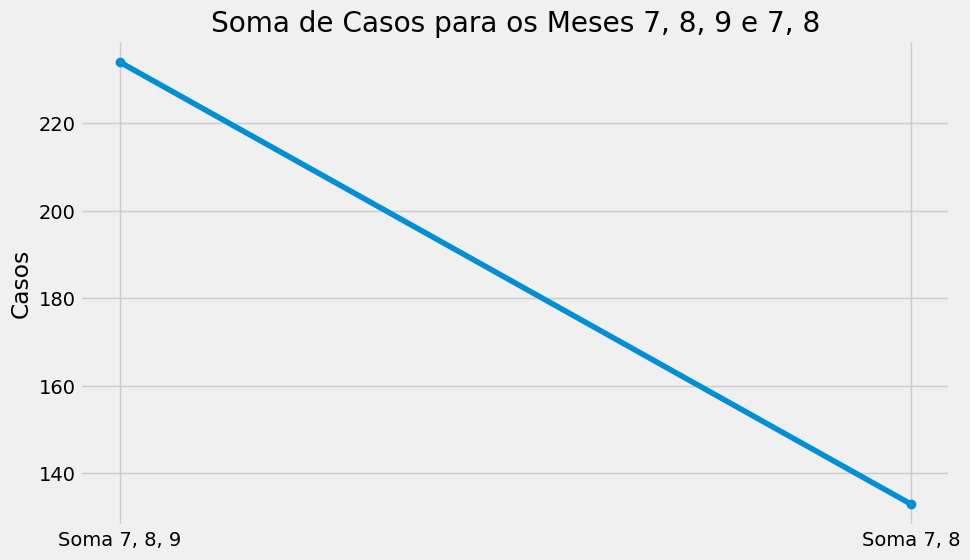

In [ ]:
# Agrupe os dados por mês e calcule o total de casos em cada mês
casos_por_mes = data.groupby("mes")["casos"].sum()

# Obtenha os meses únicos
meses = casos_por_mes.index

# Obtenha o número de casos para cada mês
casos = casos_por_mes.values

# Crie uma coluna "soma_7_8_9" para representar a soma dos meses 7, 8 e 9
data["soma_7_8_9"] = data[data["mes"].isin([7, 8, 9])]["casos"].sum()

# Crie uma coluna "soma_7_8" para representar a soma dos meses 7 e 8
data["soma_7_8"] = data[data["mes"].isin([7, 8])]["casos"].sum()

# Crie um gráfico de linhas para visualizar as somas dos meses 7, 8, 9 e 7, 8
plt.figure(figsize=(10, 6))
plt.plot([1, 2], [data["soma_7_8_9"].values[0], data["soma_7_8"].values[0]], marker='o', linestyle='-')
plt.xticks([1, 2], ['Soma 7, 8, 9', 'Soma 7, 8'])
plt.ylabel("Casos")
plt.title("Soma de Casos para os Meses 7, 8, 9 e 7, 8")
plt.grid(True)
plt.show()